Arewa Data Science Academy
Deep Learning Cohort2.0
Name: Sa'ida Abdullahi
Email: abdullahisaida3@gmail.com
Title: Week 4 Solution
Exercises Solution

In [1]:
# Check for GPU
!nvidia-smi

Fri Feb 28 21:32:35 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   47C    P8             12W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device
#

2.5.1+cu124


'cuda'

1. What are 3 areas in industry where computer vision is currently being used?

Healthcare: Computer vision helps analyze medical images, spotting issues that might be hard for the human eye to catch.

Autonomous vehicles: Enables self-driving cars to recognize objects, road signs, and pedestrians.

Security & Surveillance: From unlocking your phone with facial recognition to identifying threats in security footage, computer vision plays a huge role in keeping places secure.

2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

Overfitting is an undesirable machine learning behavior that occurs when the machine learning model gives accurate predictions for training data but not for new data.

3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.

1. Hold-out (data)
Rather than using all of our data for training, we can simply split our dataset into two sets: training and testing. A common split ratio is 80% for training and 20% for testing.
2. Cross-validation (data)
We can split our dataset into k groups (k-fold cross-validation). We let one of the groups to be the testing set (please see hold-out explanation) and the others as the training set, and repeat this process until each individual group has been used as the testing set (e.g., k repeats).
3. Data augmentation (data)
A larger dataset would reduce overfitting. If we cannot gather more data and are constrained to the data we have in our current dataset, we can apply data augmentation to artificially increase the size of our dataset. For example, if we are training for an image classification task, we can perform various image transformations to our image dataset (e.g., flipping, rotating, rescaling, shifting).

4. Spend 20-minutes reading and clicking through the CNN Explainer website.
Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

5. Load the torchvision.datasets.MNIST() train and test datasets.

In [4]:
import torchvision
from torchvision import datasets, transforms

# Define transform
transform = transforms.ToTensor()

# Load dataset
train_data = datasets.FashionMNIST(root="data", train=True, transform=transform, download=True, target_transform=None)
test_data = datasets.FashionMNIST(root="data", train=False, transform=transform, download=True, target_transform=None)

print(f"Train Dataset: {len(train_data)} samples")
print(f"Test Dataset: {len(test_data)} samples")

100%|██████████| 26.4M/26.4M [00:02<00:00, 13.2MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 208kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.89MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 15.9MB/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw

Train Dataset: 60000 samples
Test Dataset: 10000 samples


6. Visualize at least 5 different samples of the MNIST training dataset.

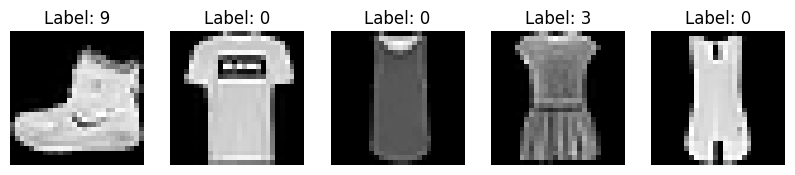

In [5]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i in range(5):
    image, label = train_data[i]
    axes[i].imshow(image.squeeze(), cmap="gray")
    axes[i].set_title(f"Label: {label}")
    axes[i].axis("off")
plt.show()

7. Turn the MNIST train and test datasets into dataloaders using torch.utils.data.DataLoader, set the batch_size=32.

In [7]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

8. Recreate model_2 used in this notebook (the same model from the CNN Explainer website, also known as TinyVGG) capable of fitting on the MNIST dataset.

In [13]:
import torch
import torch.nn as nn

# Define FashionMNISTModelV2 model for MNIST
class FashionMNISTModelV2(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)  # Reduce spatial dimensions
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)  # Reduce spatial dimensions
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units * 7 * 7, out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        x = self.block_2(x)
        x = self.classifier(x)
        return x

# Set device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Instantiate model for MNIST (1 input channel, 10 classes)
model_2 = FashionMNISTModelV2(input_shape=1, hidden_units=10, output_shape=10).to(device)

# Print model architecture
print(model_2)

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)


9. Train the model you built in exercise 8. on CPU and GPU and see how long it takes on each.

In [15]:
import torch
from timeit import default_timer as timer

# Check if GPU is available
device = "cuda" if torch.cuda.is_available() else "cpu"

# Define class names for FashionMNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Move model to device
model_2 = FashionMNISTModelV2(input_shape=1, hidden_units=10, output_shape=len(class_names)).to(device)

# Set loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_2.parameters(), lr=0.001)

# Training function
def train_model(model, dataloader, epochs=3):
    model.to(device)
    start_time = timer()

    for epoch in range(epochs):
        print(f"Epoch {epoch+1}/{epochs}")
        model.train()
        train_loss = 0

        for batch, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)

            optimizer.zero_grad()
            y_pred = model(X)
            loss = loss_fn(y_pred, y)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

        print(f"Train Loss: {train_loss/len(dataloader):.4f}")

    end_time = timer()
    print(f"Training Time: {end_time - start_time:.2f} seconds")

# Train on CPU
print("Training on CPU:")
model_2.to("cpu")
train_model(model_2, train_loader) # Changed to train_loader

# Train on GPU (if available)
if torch.cuda.is_available():
    print("\nTraining on GPU:")
    model_2.to("cuda")
    train_model(model_2, train_loader) # Changed to train_loader

Training on CPU:
Epoch 1/3
Train Loss: 0.5552
Epoch 2/3
Train Loss: 0.3625
Epoch 3/3
Train Loss: 0.3243
Training Time: 31.68 seconds

Training on GPU:
Epoch 1/3
Train Loss: 0.2999
Epoch 2/3
Train Loss: 0.2804
Epoch 3/3
Train Loss: 0.2669
Training Time: 30.57 seconds


10. Make predictions using your trained model and visualize at least 5 of them comparing the prediction to the target label.

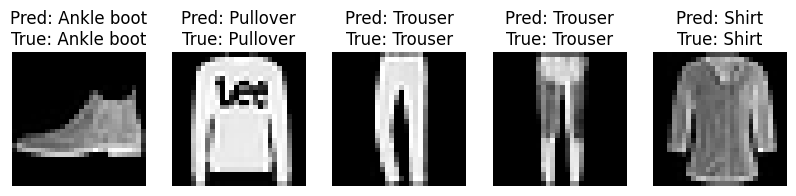

In [17]:
import matplotlib.pyplot as plt

# Function to make and visualize predictions
def make_predictions(model, dataloader, num_images=5):
    model.eval()
    X_batch, y_batch = next(iter(dataloader))
    X_batch, y_batch = X_batch[:num_images].to(device), y_batch[:num_images].to(device)

    with torch.inference_mode():
        y_pred = model(X_batch).argmax(dim=1)

    # Plot images with predictions
    fig, axes = plt.subplots(1, num_images, figsize=(10, 3))
    for i, ax in enumerate(axes):
        ax.imshow(X_batch[i].cpu().squeeze(), cmap="gray")
        ax.set_title(f"Pred: {class_names[y_pred[i]]}\nTrue: {class_names[y_batch[i]]}")
        ax.axis("off")

make_predictions(model_2, test_loader)

11. Plot a confusion matrix comparing your model's predictions to the truth labels.

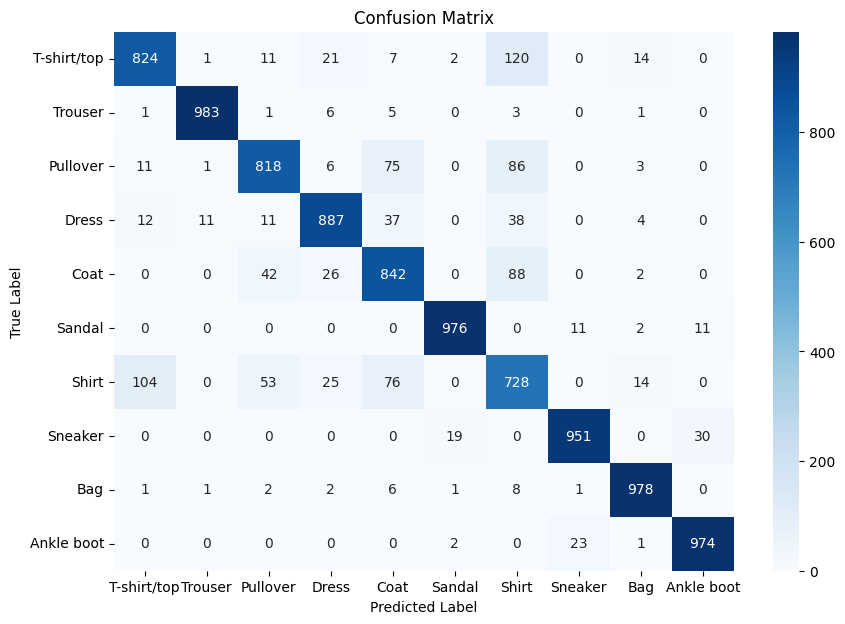

In [19]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import torch

# Get all predictions and labels
y_preds = []
y_true = []

model_2.eval()
with torch.inference_mode():
    for X, y in test_loader:
        X, y = X.to(device), y.to(device)
        y_pred = model_2(X).argmax(dim=1)
        y_preds.extend(y_pred.cpu().numpy())
        y_true.extend(y.cpu().numpy())

# Create confusion matrix
cm = confusion_matrix(y_true, y_preds)

# Plot
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

12. Create a random tensor of shape [1, 3, 64, 64] and pass it through a nn.Conv2d() layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the kernel_size parameter goes up and down?

In [20]:
random_tensor = torch.randn(1, 3, 64, 64)  # Shape: (batch_size, channels, height, width)

conv1 = nn.Conv2d(in_channels=3, out_channels=10, kernel_size=3, padding=1)
conv2 = nn.Conv2d(in_channels=3, out_channels=10, kernel_size=5, padding=2)
conv3 = nn.Conv2d(in_channels=3, out_channels=10, kernel_size=7, padding=3)

output1 = conv1(random_tensor)
output2 = conv2(random_tensor)
output3 = conv3(random_tensor)

print(f"Input shape: {random_tensor.shape}")
print(f"Output shape with kernel_size=3: {output1.shape}")
print(f"Output shape with kernel_size=5: {output2.shape}")
print(f"Output shape with kernel_size=7: {output3.shape}")

Input shape: torch.Size([1, 3, 64, 64])
Output shape with kernel_size=3: torch.Size([1, 10, 64, 64])
Output shape with kernel_size=5: torch.Size([1, 10, 64, 64])
Output shape with kernel_size=7: torch.Size([1, 10, 64, 64])


13 . Use a model similar to the trained model_2 from this notebook to make predictions on the test torchvision.datasets.FashionMNIST dataset.
Then plot some predictions where the model was wrong alongside what the label of the image should've been.
After visualizing these predictions do you think it's more of a modelling error or a data error?
As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

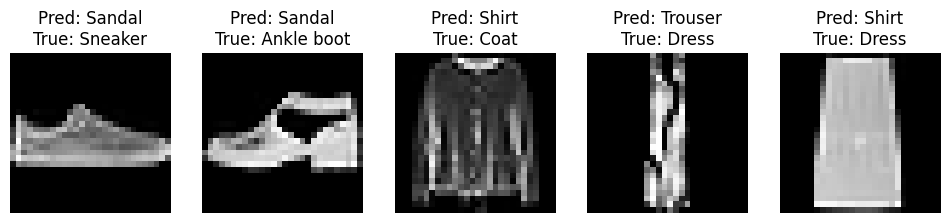

In [22]:
# Make predictions on the FashionMNIST test set
model_2.eval()
incorrect_samples = []

with torch.inference_mode():
    for X, y in test_loader:
        X, y = X.to(device), y.to(device)
        y_pred = model_2(X).argmax(dim=1)

        # Store misclassified samples
        for i in range(len(y)):
            if y_pred[i] != y[i]:
                incorrect_samples.append((X[i].cpu(), y_pred[i].cpu().item(), y[i].cpu().item()))

# Plot some incorrect predictions
num_images = 5
fig, axes = plt.subplots(1, num_images, figsize=(12, 3))
for i in range(num_images):
    img, pred, true = incorrect_samples[i]
    axes[i].imshow(img.squeeze(), cmap="gray")
    axes[i].set_title(f"Pred: {class_names[pred]}\nTrue: {class_names[true]}")
    axes[i].axis("off")

Are the mistakes due to model limitations or label ambiguity?

If the model confuses "Shirt" and "T-shirt/top", this may be a data labeling issue since these categories are visually similar.
If the model misclassifies simple objects, it might indicate model limitations (e.g., not enough training data or insufficient complexity).
Reviewing more misclassifications can reveal whether errors come from unclear data or model weaknesses.